To run this, press "*Runtime*" and press "*Run all*" on a **free** Tesla T4 Google Colab instance!
<div class="align-center">
<a href="https://unsloth.ai/"><img src="https://github.com/unslothai/unsloth/raw/main/images/unsloth%20new%20logo.png" width="115"></a>
<a href="https://discord.gg/unsloth"><img src="https://github.com/unslothai/unsloth/raw/main/images/Discord button.png" width="145"></a>
<a href="https://docs.unsloth.ai/"><img src="https://github.com/unslothai/unsloth/blob/main/images/documentation%20green%20button.png?raw=true" width="125"></a></a> Join Discord if you need help + ⭐ <i>Star us on <a href="https://github.com/unslothai/unsloth">Github</a> </i> ⭐
</div>

To install Unsloth on your own computer, follow the installation instructions on our Github page [here](https://docs.unsloth.ai/get-started/installing-+-updating).

You will learn how to do [data prep](#Data), how to [train](#Train), how to [run the model](#Inference), & [how to save it](#Save)


### News

Unsloth now supports Text-to-Speech (TTS) models. Read our [guide here](https://docs.unsloth.ai/basics/text-to-speech-tts-fine-tuning).

Read our **[Gemma 3N Guide](https://docs.unsloth.ai/basics/gemma-3n-how-to-run-and-fine-tune)** and check out our new **[Dynamic 2.0](https://docs.unsloth.ai/basics/unsloth-dynamic-2.0-ggufs)** quants which outperforms other quantization methods!

Visit our docs for all our [model uploads](https://docs.unsloth.ai/get-started/all-our-models) and [notebooks](https://docs.unsloth.ai/get-started/unsloth-notebooks).


### Unsloth

`FastModel` supports loading nearly any model now! This includes Vision and Text models!

In [ ]:
from unsloth import FastVisionModel
import torch

torch._dynamo.config.cache_size_limit = 32

fourbit_models = [
    # 4bit dynamic quants for superior accuracy and low memory use
    "unsloth/gemma-3n-E4B-it-unsloth-bnb-4bit",
    "unsloth/gemma-3n-E2B-it-unsloth-bnb-4bit",
    # Pretrained models
    "unsloth/gemma-3n-E4B-unsloth-bnb-4bit",
    "unsloth/gemma-3n-E2B-unsloth-bnb-4bit",

    # Other Gemma 3 quants
    "unsloth/gemma-3-1b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-4b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-12b-it-unsloth-bnb-4bit",
    "unsloth/gemma-3-27b-it-unsloth-bnb-4bit",
] # More models at https://huggingface.co/unsloth

model, processor = FastVisionModel.from_pretrained(
    model_name = "unsloth/gemma-3n-E4B-it",
    dtype = None, # None for auto detection
    max_seq_length = 2048, # Choose any for long context!
    load_in_4bit = True,  # 4 bit quantization to reduce memory
    full_finetuning = False, # [NEW!] We have full finetuning now!
    # token = "hf_...", # use one if using gated models
)

/app/unsloth/unsloth/__init__.py:174: UserWarning: Unsloth: Running `ldconfig /usr/lib64-nvidia` to link CUDA.
  warnings.warn(
/app/unsloth/unsloth/__init__.py:208: UserWarning: Unsloth: CUDA is not linked properly.
Try running `python -m bitsandbytes` then `python -m xformers.info`
We tried running `ldconfig /usr/lib64-nvidia` ourselves, but it didn't work.
You need to run in your terminal `sudo ldconfig /usr/lib64-nvidia` yourself, then import Unsloth.
Also try `sudo ldconfig /usr/local/cuda-xx.x` - find the latest cuda version.
Unsloth will still run for now, but maybe it might crash - let's hope it works!
  warnings.warn(


🦥 Unsloth: Will patch your computer to enable 2x faster free finetuning.


/app/unsloth/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


🦥 Unsloth Zoo will now patch everything to make training faster!


/app/unsloth/venv/lib/python3.12/site-packages/unsloth_zoo/gradient_checkpointing.py:339: UserWarning: expandable_segments not supported on this platform (Triggered internally at /pytorch/c10/hip/HIPAllocatorConfig.h:36.)
  GPU_BUFFERS = tuple([torch.empty(2*256*2048, dtype = dtype, device = f"{DEVICE_TYPE}:{i}") for i in range(n_gpus)])


==((====))==  Unsloth 2025.7.5: Fast Gemma3N patching. Transformers: 4.53.2.
   \\   /|    AMD Radeon PRO W7900. Num GPUs = 1. Max memory: 44.984 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.9.0.dev20250718+rocm6.3. CUDA: 11.0. CUDA Toolkit: None. Triton: 3.1.0+cf34004b8a
\        /    Bfloat16 = TRUE. FA [Xformers = None. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!
Unsloth: Gemma3N does not support SDPA - switching to eager!


Loading checkpoint shards: 100%|██████████████████████████████████████████████████████████| 3/3 [00:04<00:00,  1.55s/it]


# Let's finetune Gemma 3N!

You can finetune the vision and text parts for now through selection - the audio part can also be finetuned - we're working to make it selectable as well!

We now add LoRA adapters so we only need to update a small amount of parameters!

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = True, # Turn off for just text!
    finetune_language_layers   = True,  # Should leave on!
    finetune_attention_modules = True,  # Attention good for GRPO
    finetune_mlp_modules       = True,  # SHould leave on always!

    r = 8,           # Larger = higher accuracy, but might overfit
    lora_alpha = 8,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
)

Unsloth: Making `model.base_model.model.model.language_model` require gradients


In [ ]:
import csv, random, os, re
from pathlib import Path
from collections import defaultdict
from datasets import load_dataset
from PIL import Image

RAW_CSV  = Path("/app/model/plant_state_descriptions_output.csv")
DATA_CSV = Path("/app/model/plant-description-dataset.csv")
IMG_ROOT = Path("/app/model/PlantVillage-Dataset/raw/color")

LANGS = [
    "English","Chinese","Hindi","Spanish","Arabic","French","Bengali","Portuguese",
    "Russian","Indonesian","Urdu","German","Japanese","Nigerian Pidgin","Marathi",
    "Vietnamese","Telugu","Hausa","Turkish","Swahili","Tagalog","Tamil","Korean",
    "Thai","Javanese","Italian","Hebrew"
]

def _clean(t: str) -> str:
    if t.startswith("Pepper,_bell"):
        return "Bell Pepper"
    t = t.replace("_", " ").replace("  ", " ").strip()
    return re.sub(r"\(([^)]+)\)", lambda m: f"({m.group(1).title()})", t).title()

lookup = defaultdict(lambda: defaultdict(list))
with RAW_CSV.open(encoding="utf-8") as f:
    for r in csv.DictReader(f):
        plant = _clean(r["Plant"]);  state = _clean(r["State"])
        lookup[f"{plant}___{state}"][r["Language"]].append(r["Text"])

if not DATA_CSV.exists():
    print("Building", DATA_CSV)
    with DATA_CSV.open("w", newline="", encoding="utf-8") as f:
        wr = csv.writer(f)
        wr.writerow(["Plant","State","Language","Text","Image"])

        for dirpath, _, files in os.walk(IMG_ROOT):
            if not files: continue

            raw_folder = Path(dirpath).name
            raw_plant, raw_state = raw_folder.split("___", 1)

            plant = _clean(raw_plant);  state = _clean(raw_state)
            key   = f"{plant}___{state}"
            pool  = lookup.get(key)
            if not pool: continue

            langs_avail = [lang for lang in LANGS if lang in pool]
            if not langs_avail: continue

            for idx, img in enumerate(sorted(files)):
                lang  = langs_avail[idx % len(langs_avail)]
                text  = random.choice(pool[lang])
                img_path = str(Path(dirpath) / img)
                wr.writerow([plant, state, lang, text, img_path])
    print("done.")

INSTRUCTION = ("Examine this image returning information about the plant "
               "and any state (disease or healthy), return text in {lang}")

ds = load_dataset("csv", data_files=str(DATA_CSV), split="train", keep_in_memory=True)
ds = ds.with_format("python")

def row_to_chat(ex):
    img = Image.open(ex["Image"]).convert("RGB")
    return {
        "messages": [
            {
                "role": "user",
                "content": [
                    {"type": "text",
                     "text": INSTRUCTION.format(lang=ex["Language"])},
                    {"type": "image", "image": img},
                ],
            },
            {
                "role": "assistant",
                "content": [{"type": "text", "text": ex["Text"]}],
            },
        ]
    }

converted_dataset = [row_to_chat(sample) for sample in ds]


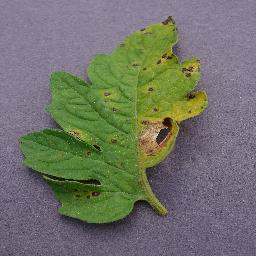

In [ ]:
converted_dataset[0]['messages'][0]['content'][1]['image']

In [ ]:
image = converted_dataset[0]['messages'][0]['content'][1]['image']

In [ ]:
from unsloth import get_chat_template

processor = get_chat_template(
    processor,
    "gemma-3"
)

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!
instruction = ("Examine this image returning information about the plant "
               "and any state (disease or healthy), return text in English")
messages = [
    {
        "role": "user",
        "content": [{"type": "image"}, {"type": "text", "text": instruction}],
    }
]
input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")

from transformers import TextStreamer

text_streamer = TextStreamer(processor, skip_prompt=True)
result = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                        use_cache=True, temperature = 1.0, top_p = 0.95, top_k = 64)

The image shows a plant leaf that appears to be **diseased**. 

Here's what I can observe:

* **Yellowing:** A significant portion of the leaf is yellowing, indicating a lack of chlorophyll and potential stress.
* **Brown Spots:** There are numerous brown spots on both the green and yellow areas of the leaf. These spots could be a sign of fungal or bacterial infection.
* **Holes:** The leaf has several holes, suggesting that insects have been feeding on it. 

Based on these observations, the plant is **not healthy** and likely suffering from a disease or pest infestation.


<a name="Train"></a>
### Train the model
Now let's use Huggingface TRL's `SFTTrainer`! More docs here: [TRL SFT docs](https://huggingface.co/docs/trl/sft_trainer). We do 60 steps to speed things up, but you can set `num_train_epochs=1` for a full run, and turn off `max_steps=None`.

In [ ]:
from trl import SFTTrainer, SFTConfig
from unsloth.trainer import UnslothVisionDataCollator

FastVisionModel.for_training(model)

trainer = SFTTrainer(
    model = model,
    train_dataset=converted_dataset,
    processing_class=processor.tokenizer,
    data_collator=UnslothVisionDataCollator(model, processor, resize=256),
    args = SFTConfig(
        per_device_train_batch_size = 1,
        gradient_accumulation_steps = 4, # Use GA to mimic batch size!
        gradient_checkpointing = True,

        gradient_checkpointing_kwargs = {"use_reentrant": False},
        warmup_steps = 5,
        num_train_epochs = 1,
        learning_rate = 2e-4, # Reduce to 2e-5 for long training runs
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        report_to = "none", # Use this for WandB etc
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        max_seq_length = 2048,
    ),
)

In [ ]:
trainer.train_dataset[100]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'Examine this image returning information about the plant and any state (disease or healthy), return text in Swahili'},
    {'type': 'image',
     'image': <PIL.Image.Image image mode=RGB size=256x256>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '## Septoria Leaf Spot kwenye Miti ya Tomato\n\n**Mkoa:** Inaelezwa na madaraka mekundu yanayopatikana kwenye majani, yanayotokea kwa rangi ya kijani mwanzoni na yanayodeพัฒนา kuwa kasaha za kahawia-nyekundu kali. Madaraka haya mara nyingi huwa na mwelekeo mwerevu ya njano karibu nao.  Ugonjwa unapotandaa, madaraka haya yanaweza kukumbiana, na kusababisha eneo kubwa la mabadiliko ya rangi ya majani na hatimaye kupungua kwa majani. Upande wa chini wa majani unaweza kuonyesha madaraka sawa, na katika visa vya kali, pia yanaweza kuathiri mmea na matunda, na kusababisha kupungua kwa matunda mapema na ongezeko la matunda.  Hali ya mazingira, hasa

# Let's train the model!

To resume a training run, set `trainer.train(resume_from_checkpoint = True)`

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 51,886 | Num Epochs = 1 | Total steps = 12,972
O^O/ \_/ \    Batch size per device = 1 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (1 x 4 x 1) = 4
 "-____-"     Trainable parameters = 19,210,240 of 7,869,188,432 (0.24% trained)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Step,Training Loss
1,7.774400
2,7.799600
3,4.860400
4,4.464200
5,3.990200
6,3.599500
7,2.854900
8,3.542800
9,3.237200
10,2.595200


<a name="Inference"></a>
### Inference
Let's run the model via Unsloth native inference! According to the `Gemma-3` team, the recommended settings for inference are `temperature = 1.0, top_p = 0.95, top_k = 64`

In [ ]:
converted_dataset[0]['messages'][1]['content']

[{'type': 'text',
  'text': "## Tomato Plant - Septoria Leaf Spot\n\n**State:** A common fungal disease affecting tomato plants, particularly prevalent in warm, humid conditions. \n\n**Description:** This disease manifests as small, circular spots on the lower leaves of the plant. These spots typically start light green, gradually darken to brown or dark grey, and may develop a yellowish halo around them.  As the infection progresses, the spots can merge, causing larger lesions and potentially leading to leaf drop.  The underside of the leaves may show grayish-white fungal growth, especially during periods of high humidity.  Severe infections can reduce the plant's ability to photosynthesize, impacting fruit development and overall plant health.  \n\n\n\n"}]

In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!
instruction = ("Examine this image returning information about the plant "
               "and any state (disease or healthy), return text in English")
messages = [
    {
        "role": "user",
        "content": [{"type": "image"}, {"type": "text", "text": instruction}],
    }
]
input_text = processor.apply_chat_template(messages, add_generation_prompt=True)
inputs = processor(
    image,
    input_text,
    add_special_tokens=False,
    return_tensors="pt",
).to("cuda")

from transformers import TextStreamer

text_streamer = TextStreamer(processor, skip_prompt=True)
result = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                        use_cache=True, temperature = 1.0, top_p = 0.95, top_k = 64)

## Tomato Plant: Septoria Leaf Spot

**State Description:**

This disease manifests as small, circular lesions on the tomato leaves, typically beginning on the lower ones. These spots are initially a pale green and gradually darken to a brownish-grey color with a yellowish border.  As the infection progresses, the spots may become black and release a powdery, greyish substance. 

Septoria leaf spot favors humid conditions and moderate temperatures. While it doesn't usually kill the plant, it can significantly reduce its yield and weaken it, making it more susceptible to other diseases and pests.  The disease can spread rapidly, especially under favorable


<a name="Save"></a>
### Saving, loading finetuned models
To save the final model as LoRA adapters, either use Huggingface's `push_to_hub` for an online save or `save_pretrained` for a local save.

**[NOTE]** This ONLY saves the LoRA adapters, and not the full model. To save to 16bit or GGUF, scroll down!

In [ ]:
model.save_pretrained("/app/model/gemma-3n")  # Local saving
processor.save_pretrained("/app/model/gemma-3n")
# model.push_to_hub("HF_ACCOUNT/gemma-3", token = "...") # Online saving
# tokenizer.push_to_hub("HF_ACCOUNT/gemma-3", token = "...") # Online saving

['/app/model/gemma-3n/processor_config.json']

### Saving to float16 for VLLM

We also support saving to `float16` directly for deployment! We save it in the folder `gemma-3N-finetune`. Set `if False` to `if True` to let it run!

In [ ]:
if True: # Change to True to save finetune!
    model.save_pretrained_merged("/app/model/gemma-3N-finetune", processor)

Found HuggingFace hub cache directory: /root/.cache/huggingface/hub
Checking cache directory for required files...
Cache check failed: model-00001-of-00004.safetensors not found in local cache.
Not all required files found in cache. Will proceed with downloading.


Unsloth: Merging weights into 16bit: 100%|███████████████████████████████████████████████| 4/4 [22:04<00:00, 331.11s/it]


In [ ]:
import kagglehub

kagglehub.login()

# Replace with path to directory containing model files.
LOCAL_MODEL_DIR = '/app/model/gemma-3N-finetune'

MODEL_SLUG = 'Gemma3N-E4B-it-PlantView' # Replace with model slug.

# Learn more about naming model variations at
# https://www.kaggle.com/docs/models#name-model.
VARIATION_SLUG = 'default' # Replace with variation slug.

kagglehub.model_upload(
  handle = f"timothylovett/{MODEL_SLUG}/keras/{VARIATION_SLUG}",
  local_model_dir = LOCAL_MODEL_DIR,
  version_notes = 'Update 2025-07-21')

Uploading Model https://www.kaggle.com/models/timothylovett/Gemma3N-E4B-it-PlantView/keras/default ...
Model 'Gemma3N-E4B-it-PlantView' does not exist or access is forbidden for user 'timothylovett'. Creating or handling Model...


HTTPError: 401 Client Error: Unauthorized for url: https://www.kaggle.com/api/v1/models/create/new